Coordenadas del camino óptimo: [[ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  0.]
 [ 0.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 0.  2.]
 [-1.  2.]
 [-1.  1.]
 [-2.  1.]
 [-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]]


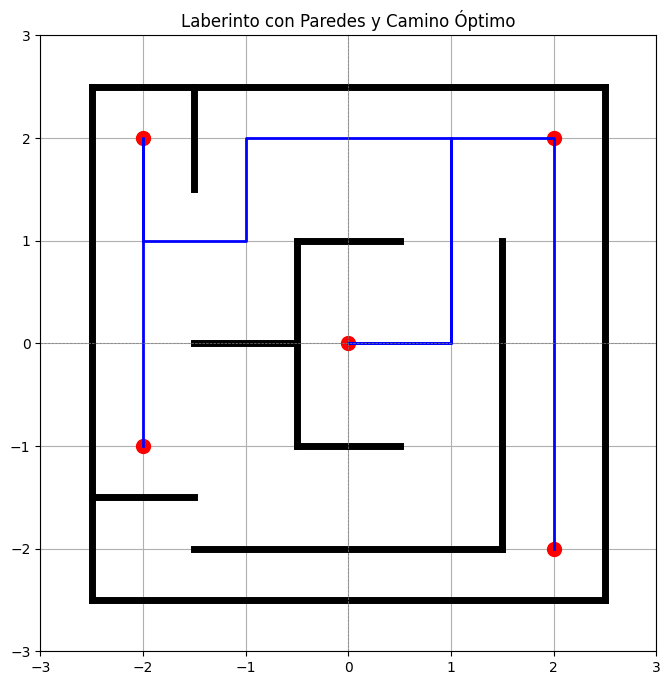

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A*
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos
def generate_neighbors(point):
    x, y = point
    return [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2)
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


Coordenadas del camino óptimo: [[ 0.  0.]
 [ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 0.  2.]
 [-1.  2.]
 [-1.  1.]
 [-2.  1.]
 [-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]
 [-2.  0.]
 [-2.  1.]
 [-1.  1.]
 [-1.  2.]
 [ 0.  2.]
 [ 1.  2.]
 [ 2.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]
 [ 1.  2.]
 [ 1.  1.]
 [ 1.  0.]
 [ 0.  0.]]


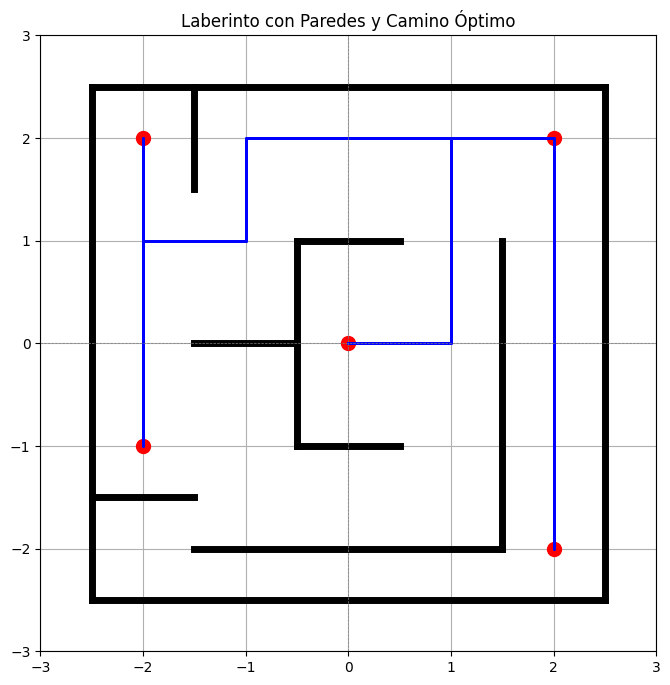

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A*
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos
def generate_neighbors(point):
    x, y = point
    return [(x + dx, y + dy) for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino hamiltoniano utilizando el enfoque de Salto Fosbury
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Regresar al inicio
        return_segment = a_star(total_path[-1], total_path[0])
        if return_segment is None:
            valid_path = False
        else:
            total_path.extend(return_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2)
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


Coordenadas del camino óptimo: [[-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]
 [-2.  0.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]]


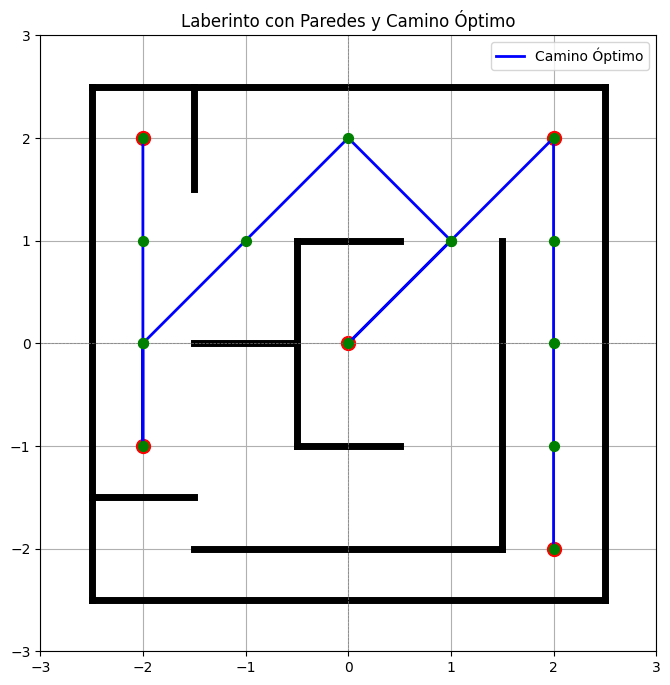

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino Óptimo')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


Coordenadas del camino óptimo: [[-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]
 [-2.  0.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]]


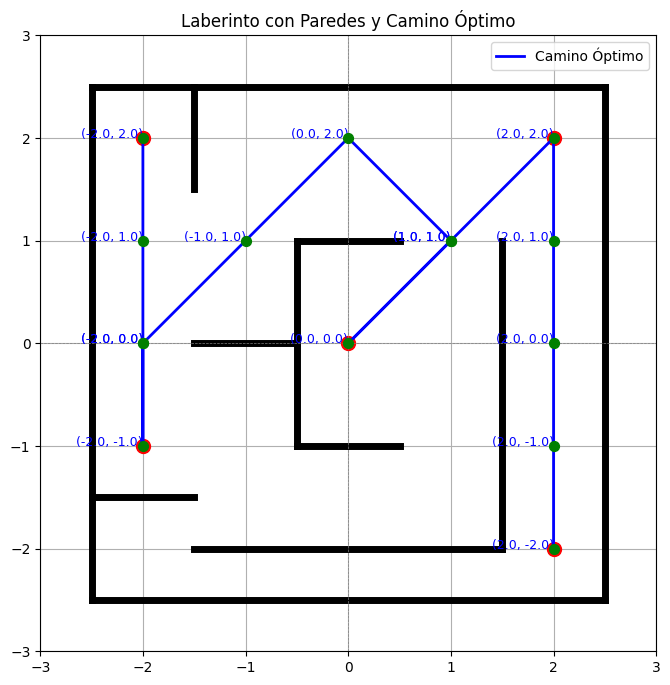

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino Óptimo')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

        # Imprimir las coordenadas del camino en el gráfico con un decimal
        for (x, y) in path:
            plt.text(x, y, f"({x:.1f}, {y:.1f})", fontsize=9, ha='right', color='blue')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


Coordenadas del camino óptimo: [[ 0.  0.]
 [-2.  0.]
 [-2.  1.]
 [-2.  2.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]
 [ 1.  1.]
 [ 0.  0.]]


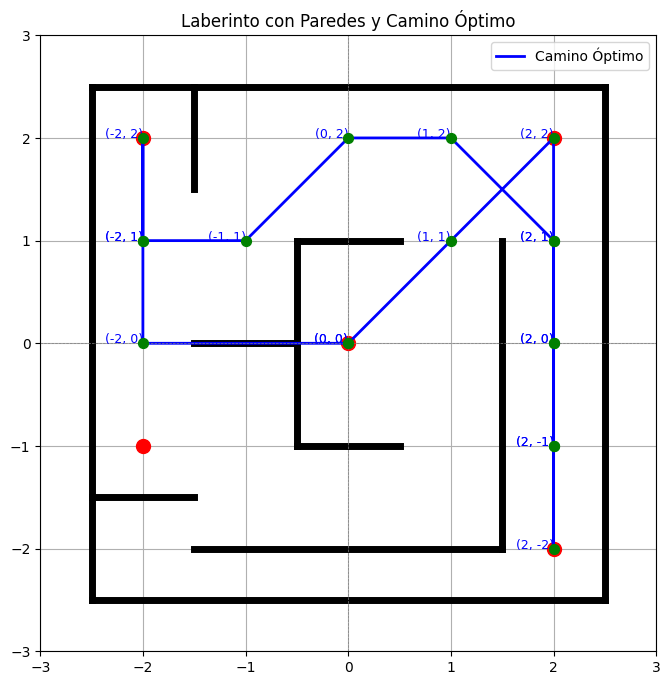

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))


# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    start = goals[0]  # Supongamos que el robot comienza en el primer objetivo
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [start]  # Comenzar desde el punto de partida
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Añadir el camino de regreso al punto de partida
        path_back = a_star(perm[-1], start)
        if path_back is None:
            valid_path = False
        else:
            total_path.extend(path_back[1:])  # Excluir el punto de inicio del regreso

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = sum(distance(total_path[i], total_path[i + 1]) for i in range(len(total_path) - 1))
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino Óptimo')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

        # Imprimir las coordenadas del camino en el gráfico con un decimal
        for (x, y) in path:
            plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='blue')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


Coordenadas del camino óptimo: [[-2.   2. ]
 [-2.   1.5]
 [-2.   1. ]
 [-2.   0.5]
 [-2.   0. ]
 [-2.  -0.5]
 [-2.  -1. ]
 [-1.5 -1. ]
 [-1.  -1. ]
 [-0.5 -1.5]
 [ 0.  -1.5]
 [ 0.5 -1.5]
 [ 1.  -1. ]
 [ 0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]
 [ 1.5  1.5]
 [ 2.   2. ]
 [ 2.   1.5]
 [ 2.   1. ]
 [ 2.   0.5]
 [ 2.   0. ]
 [ 2.  -0.5]
 [ 2.  -1. ]
 [ 2.  -1.5]
 [ 2.  -2. ]]


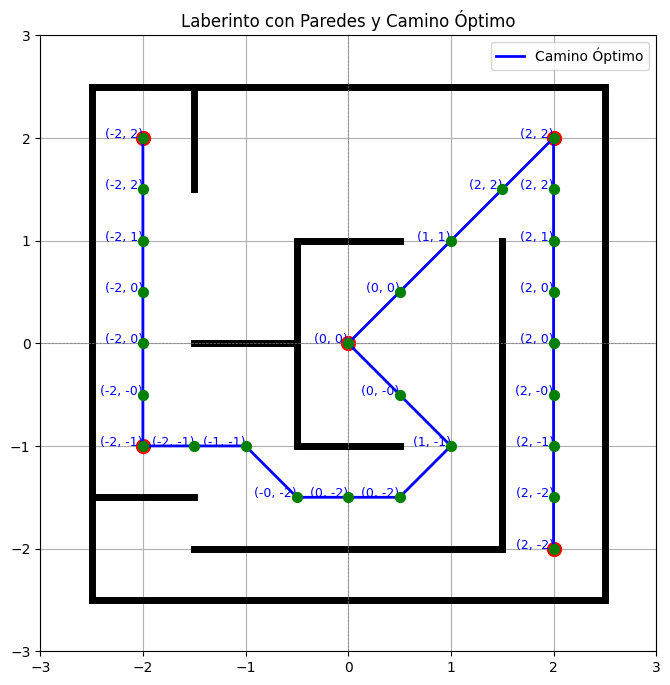

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(0.5, 0), (-0.5, 0), (0, 0.5), (0, -0.5), (0.5, 0.5), (0.5, -0.5), (-0.5, 0.5), (-0.5, -0.5)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino Óptimo')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino óptimo:", path)  # Imprimir las coordenadas

        # Imprimir las coordenadas del camino en el gráfico con un decimal
        for (x, y) in path:
            plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='blue')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino encontrado
draw_labyrinth(walls, goals, optimal_path)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y el camino
def draw_labyrinth(walls, goals, path_a_star=None, path_hamiltonian=None):
    plt.figure(figsize=(12, 6))

    # Primer subplot para A*
    plt.subplot(1, 2, 1)
    plt.title("Laberinto con Camino A*")

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino de A* si existe
    if path_a_star:
        path_a_star = np.array(path_a_star)
        plt.plot(path_a_star[:, 0], path_a_star[:, 1], 'b-', lw=2, label='Camino A*')  # Camino en azul
        plt.scatter(path_a_star[:, 0], path_a_star[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde

        # Imprimir las coordenadas del camino en el gráfico con un decimal
        for (x, y) in path_a_star:
            plt.text(x, y, f"({x:.1f}, {y:.1f})", fontsize=9, ha='right', color='blue')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

    # Segundo subplot para el camino hamiltoniano
    plt.subplot(1, 2, 2)
    plt.title("Laberinto con Camino Óptimo Hamiltoniano")

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino hamiltoniano si existe
    if path_hamiltonian:
        path_hamiltonian = np.array(path_hamiltonian)
        plt.plot(path_hamiltonian[:, 0], path_hamiltonian[:, 1], 'm-', lw=2, label='Camino Hamiltoniano')  # Camino en magenta
        plt.scatter(path_hamiltonian[:, 0], path_hamiltonian[:, 1], color='orange', s=50, zorder=5)  # Coordenadas en naranja

        # Imprimir las coordenadas del camino en el gráfico con un decimal
        for (x, y) in path_hamiltonian:
            plt.text(x, y, f"({x:.1f}, {y:.1f})", fontsize=9, ha='right', color='magenta')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)



In [ ]:
# Dibujar el laberinto y el camino encontrado

a_star_path_example = a_star(goals[0], goals[1])  # Ejemplo de camino A*



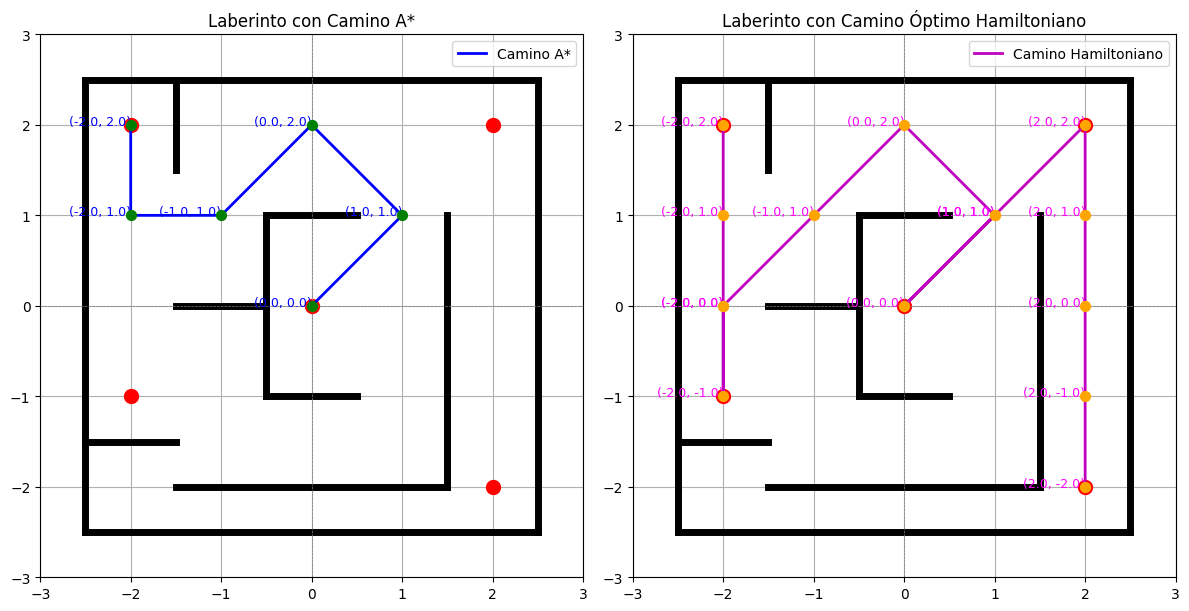

In [ ]:
draw_labyrinth(walls, goals, path_a_star=a_star_path_example, path_hamiltonian=optimal_path)

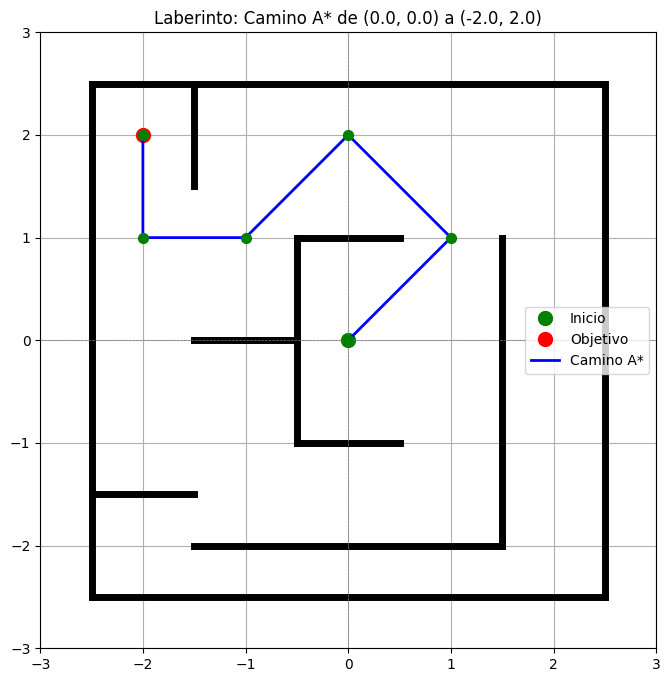

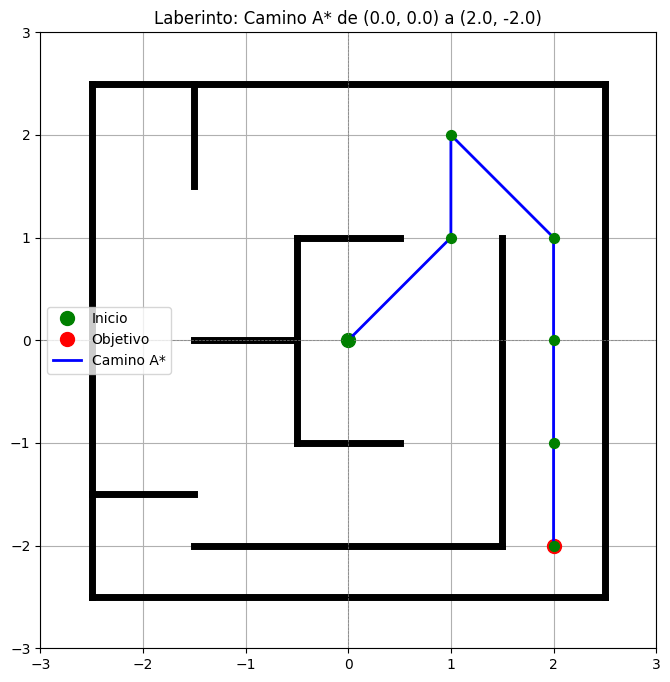

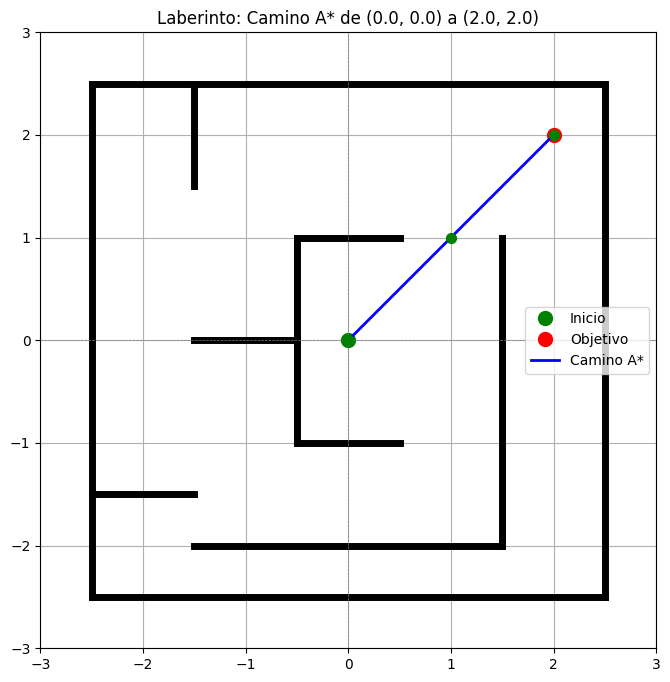

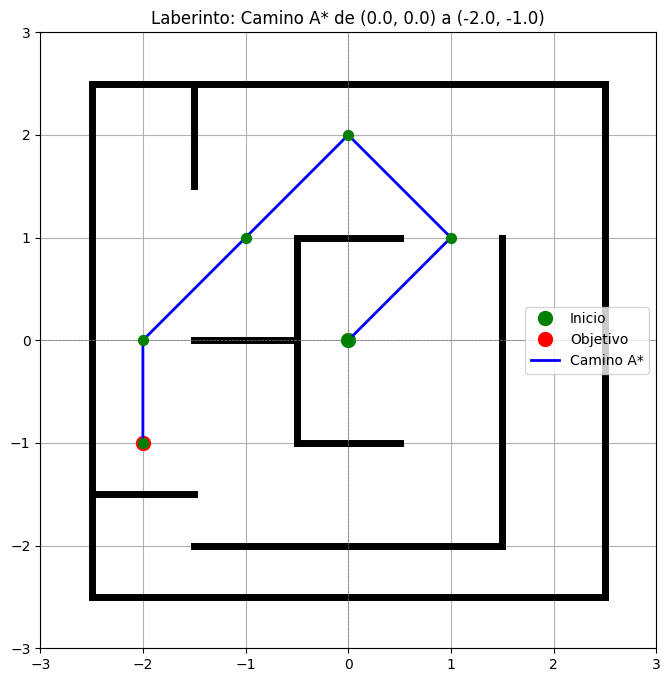

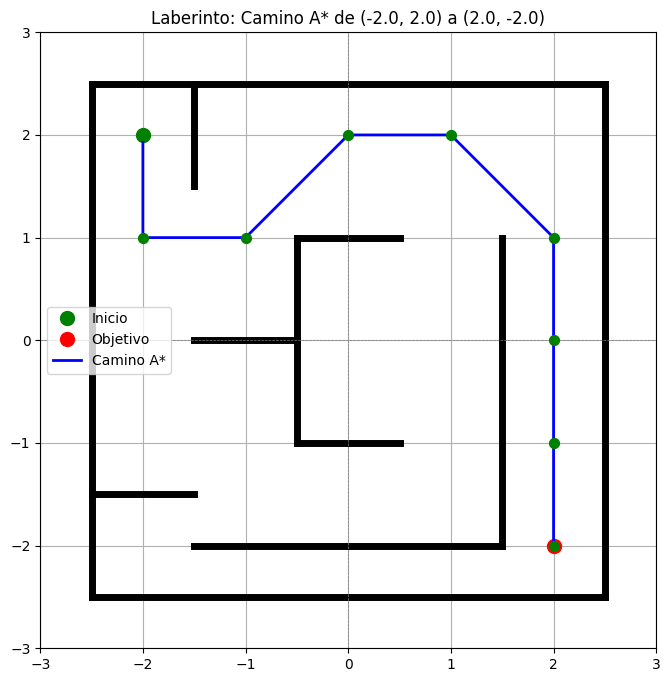

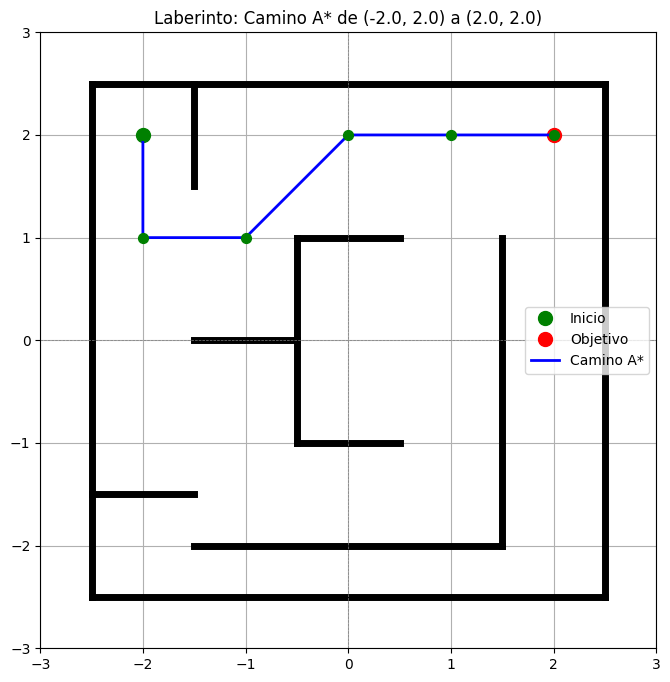

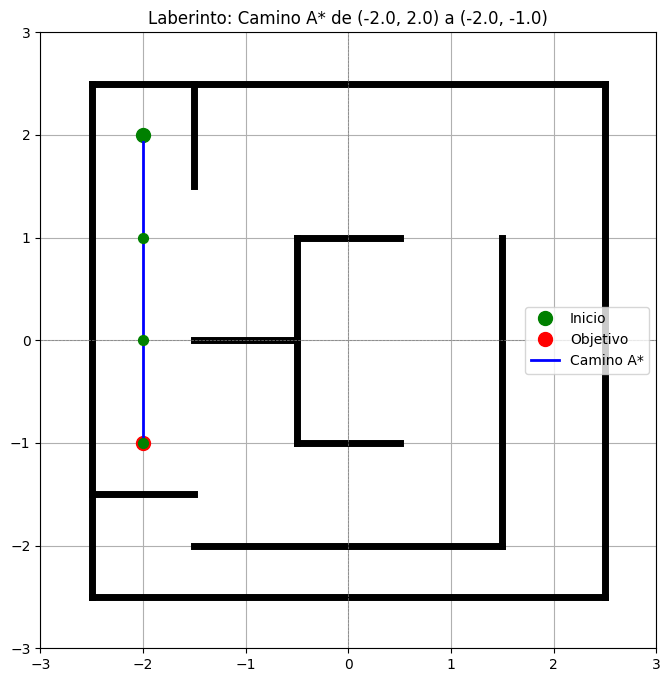

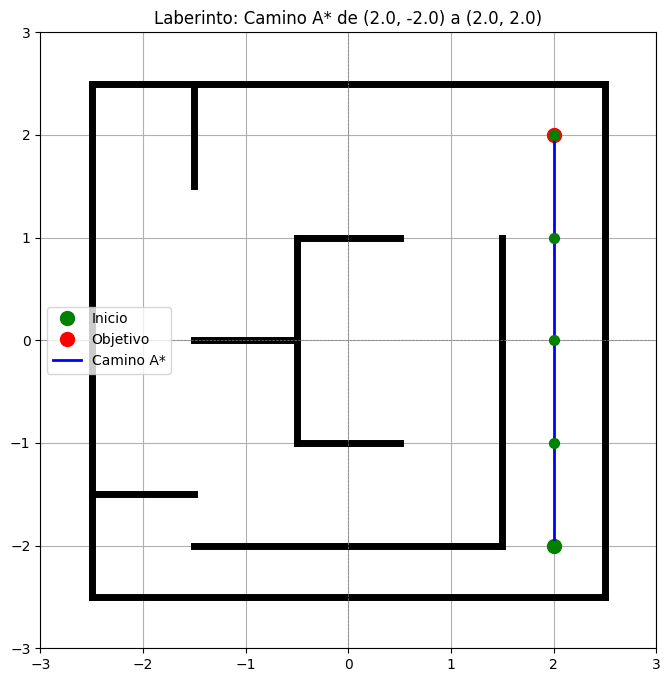

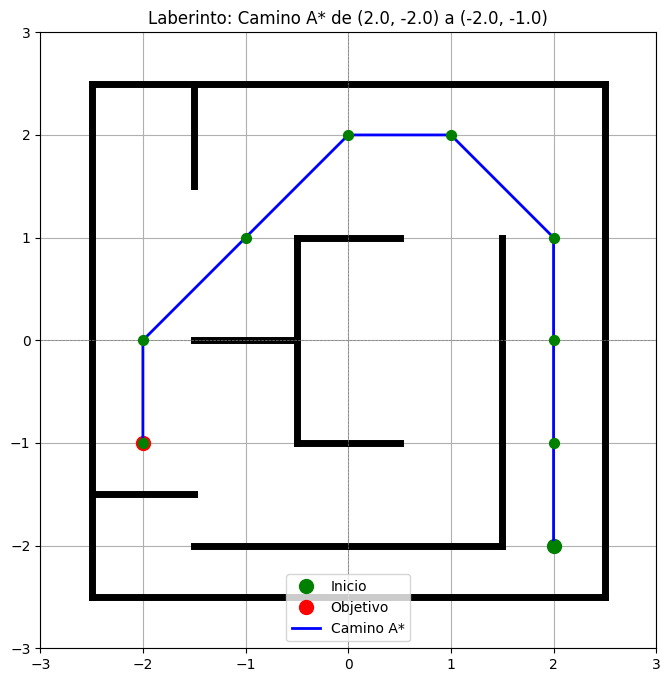

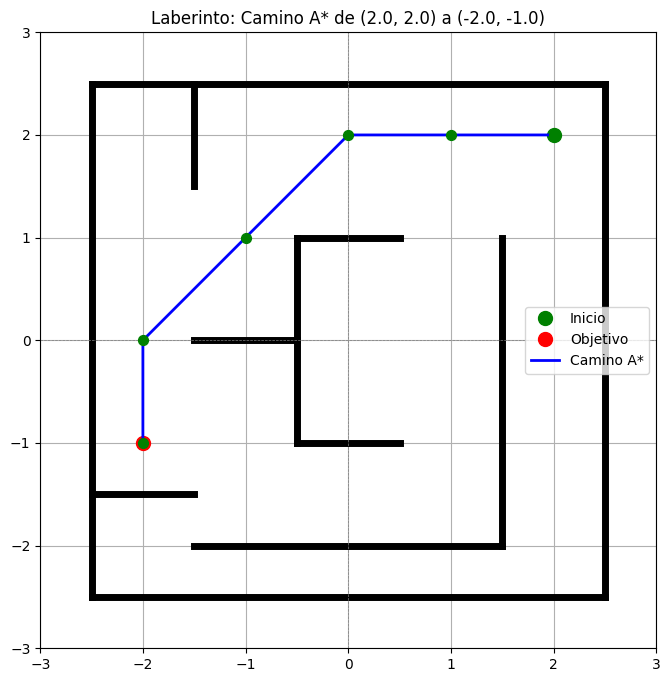

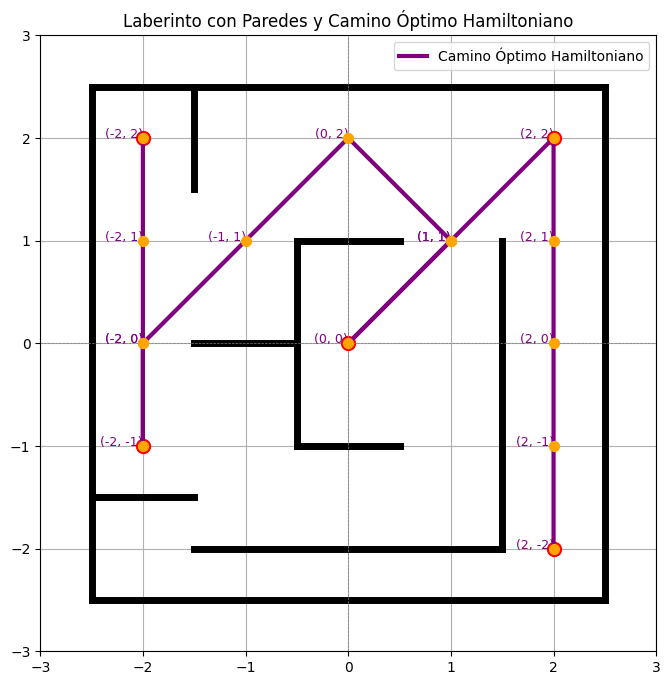

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y los caminos A*
def draw_a_star_path(walls, start, goal, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar el punto de inicio y el objetivo
    plt.plot(start[0], start[1], 'go', markersize=10, label='Inicio')  # Inicio en verde
    plt.plot(goal[0], goal[1], 'ro', markersize=10, label='Objetivo')  # Objetivo en rojo

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino A*')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title(f"Laberinto: Camino A* de {start} a {goal}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Función para dibujar el laberinto y el camino hamiltoniano
def draw_hamiltonian_path(walls, goals, hamiltonian_path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino hamiltoniano si existe
    if hamiltonian_path:
        hamiltonian_path = np.array(hamiltonian_path)
        plt.plot(hamiltonian_path[:, 0], hamiltonian_path[:, 1], 'purple', lw=3, label='Camino Óptimo Hamiltoniano')  # Camino hamiltoniano en púrpura
        plt.scatter(hamiltonian_path[:, 0], hamiltonian_path[:, 1], color='orange', s=50, zorder=5)  # Coordenadas en naranja

        # Imprimir las coordenadas del camino en el gráfico
        for (x, y) in hamiltonian_path:
            plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='purple')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo Hamiltoniano")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar y dibujar caminos A* entre cada par de puntos objetivo
for i in range(len(goals)):
    for j in range(i + 1, len(goals)):
        start = goals[i]
        goal = goals[j]
        path = a_star(start, goal)
        draw_a_star_path(walls, start, goal, path)

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino hamiltoniano
draw_hamiltonian_path(walls, goals, optimal_path)


Coordenadas del camino A*: [[ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]
 [ 0.5  1.5]
 [ 0.   1.5]
 [-0.5  1.5]
 [-1.   1. ]
 [-1.5  1. ]
 [-2.   1.5]
 [-2.   2. ]]


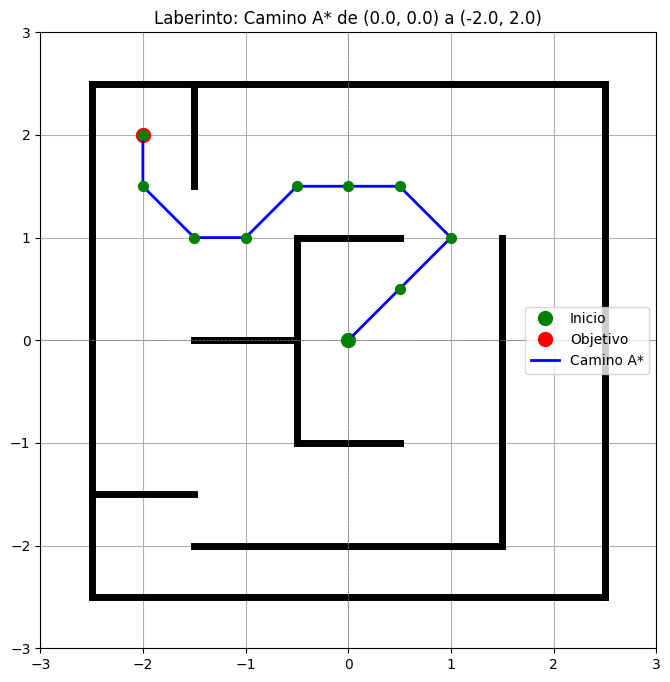

Coordenadas del camino A*: [[ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]
 [ 1.5  1.5]
 [ 2.   1. ]
 [ 2.   0.5]
 [ 2.   0. ]
 [ 2.  -0.5]
 [ 2.  -1. ]
 [ 2.  -1.5]
 [ 2.  -2. ]]


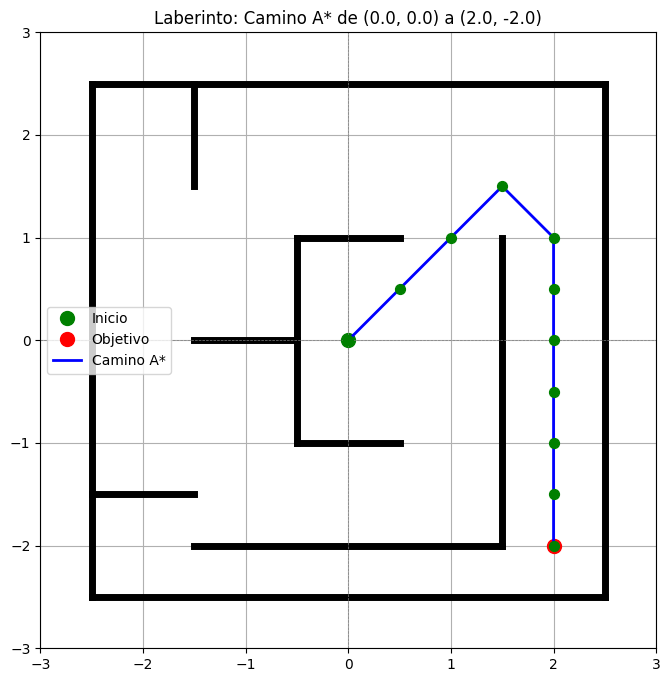

Coordenadas del camino A*: [[0.  0. ]
 [0.5 0.5]
 [1.  1. ]
 [1.5 1.5]
 [2.  2. ]]


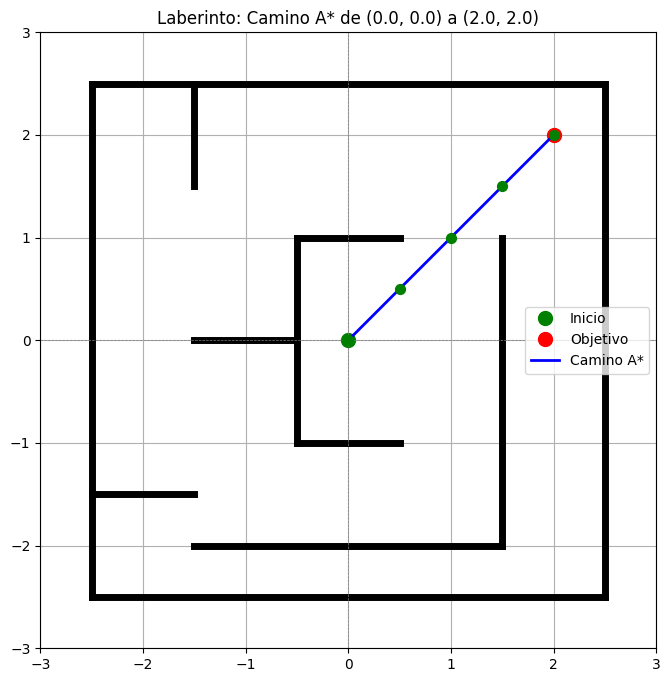

Coordenadas del camino A*: [[ 0.   0. ]
 [ 0.5 -0.5]
 [ 1.  -1. ]
 [ 0.5 -1.5]
 [ 0.  -1.5]
 [-0.5 -1.5]
 [-1.  -1. ]
 [-1.5 -1. ]
 [-2.  -1. ]]


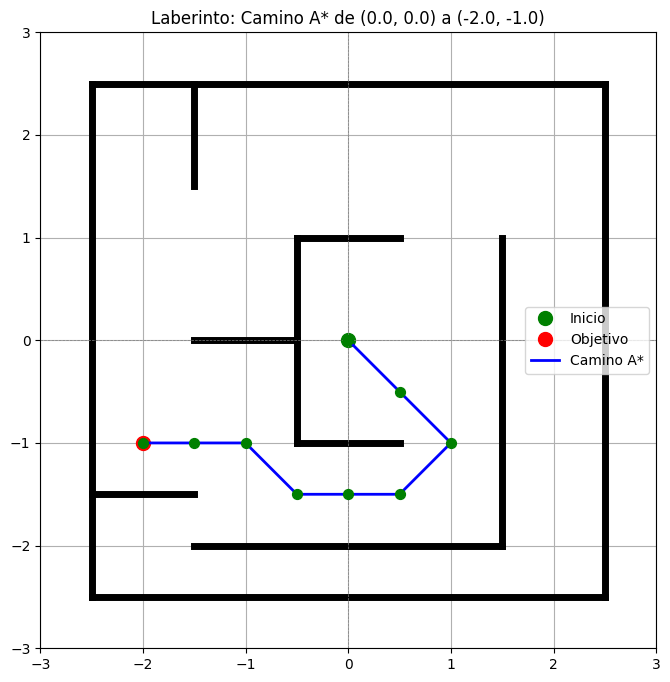

Coordenadas del camino A*: [[-2.   2. ]
 [-2.   1.5]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1.5]
 [ 0.   1.5]
 [ 0.5  1.5]
 [ 1.   1.5]
 [ 1.5  1.5]
 [ 2.   1. ]
 [ 2.   0.5]
 [ 2.   0. ]
 [ 2.  -0.5]
 [ 2.  -1. ]
 [ 2.  -1.5]
 [ 2.  -2. ]]


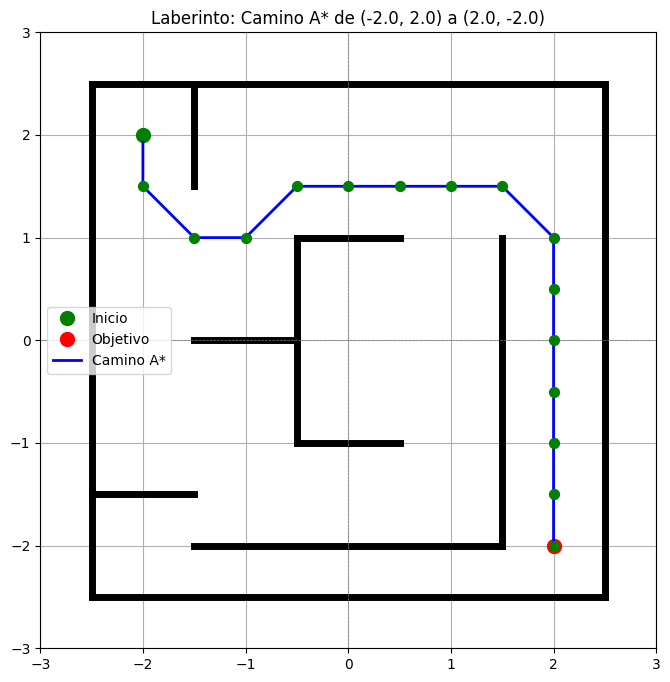

Coordenadas del camino A*: [[-2.   2. ]
 [-2.   1.5]
 [-1.5  1. ]
 [-1.   1. ]
 [-0.5  1.5]
 [ 0.   1.5]
 [ 0.5  2. ]
 [ 1.   2. ]
 [ 1.5  2. ]
 [ 2.   2. ]]


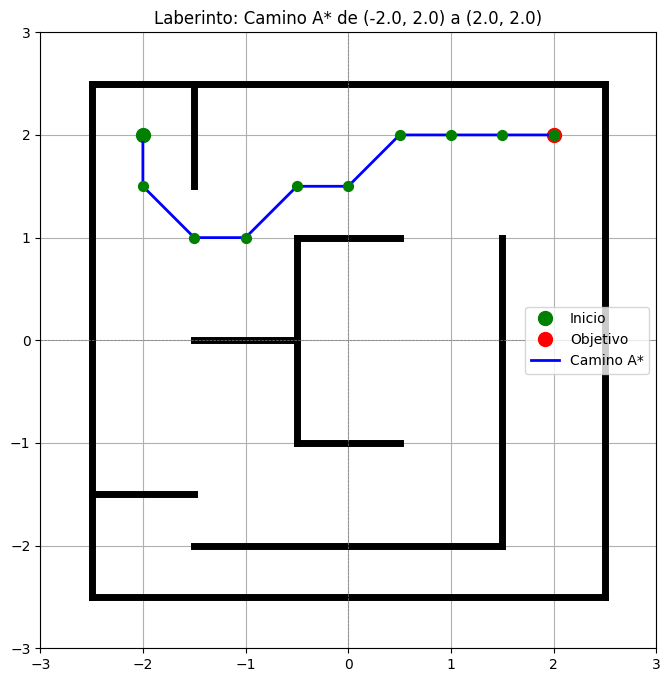

Coordenadas del camino A*: [[-2.   2. ]
 [-2.   1.5]
 [-2.   1. ]
 [-2.   0.5]
 [-2.   0. ]
 [-2.  -0.5]
 [-2.  -1. ]]


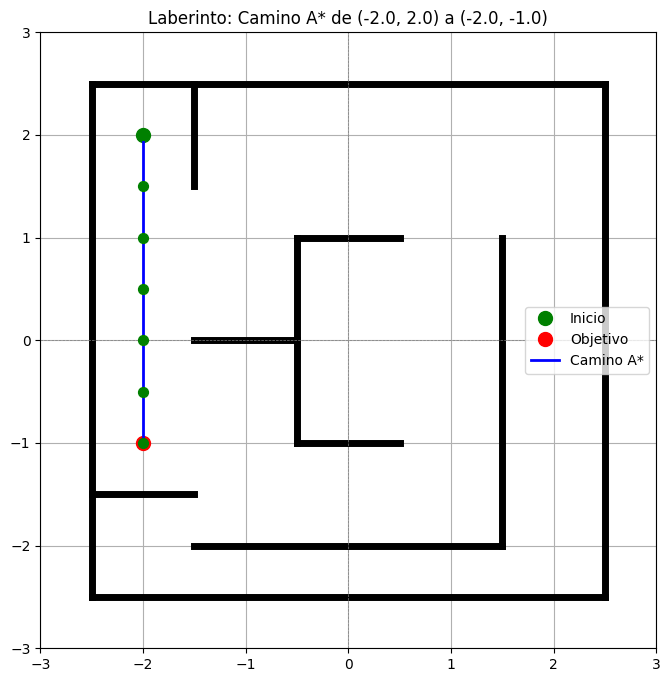

Coordenadas del camino A*: [[ 2.  -2. ]
 [ 2.  -1.5]
 [ 2.  -1. ]
 [ 2.  -0.5]
 [ 2.   0. ]
 [ 2.   0.5]
 [ 2.   1. ]
 [ 2.   1.5]
 [ 2.   2. ]]


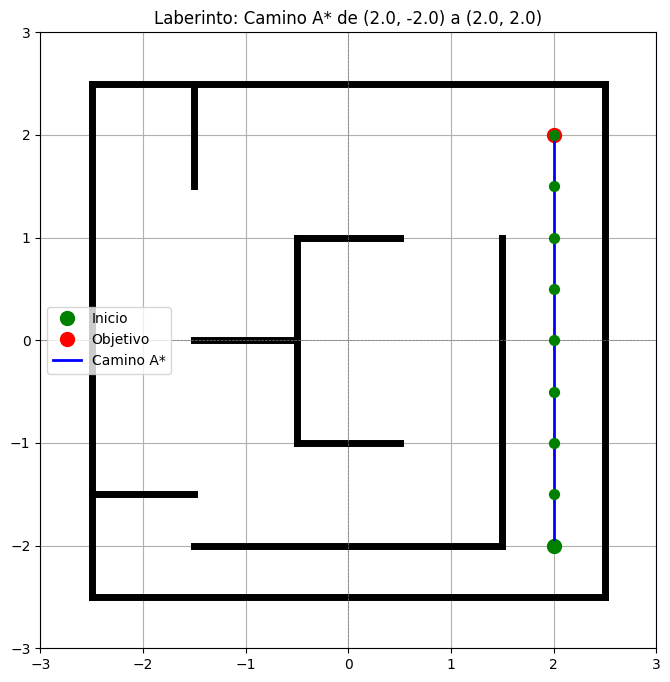

Coordenadas del camino A*: [[ 2.  -2. ]
 [ 2.  -1.5]
 [ 2.  -1. ]
 [ 2.  -0.5]
 [ 2.   0. ]
 [ 2.   0.5]
 [ 2.   1. ]
 [ 1.5  1.5]
 [ 1.   1.5]
 [ 0.5  1.5]
 [ 0.   1.5]
 [-0.5  1.5]
 [-1.   1. ]
 [-1.5  0.5]
 [-2.   0. ]
 [-2.  -0.5]
 [-2.  -1. ]]


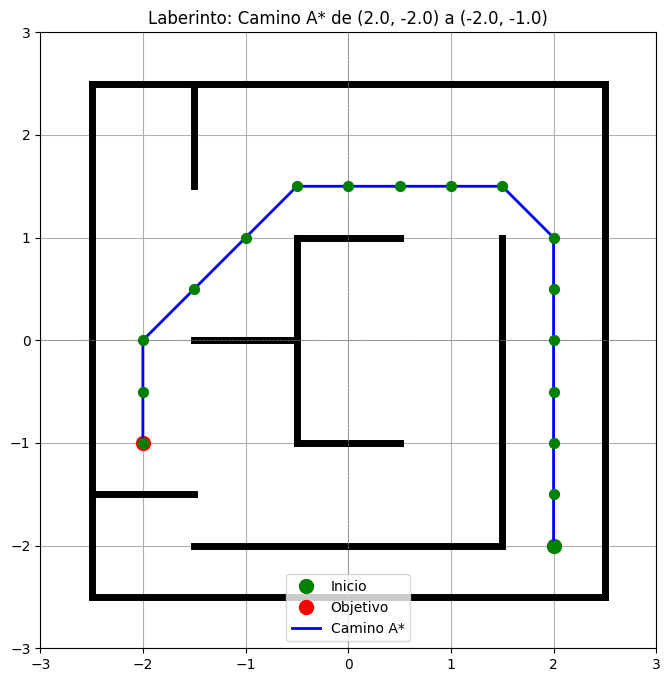

Coordenadas del camino A*: [[ 2.   2. ]
 [ 1.5  1.5]
 [ 1.   1.5]
 [ 0.5  1.5]
 [ 0.   1.5]
 [-0.5  1.5]
 [-1.   1. ]
 [-1.5  0.5]
 [-2.   0. ]
 [-2.  -0.5]
 [-2.  -1. ]]


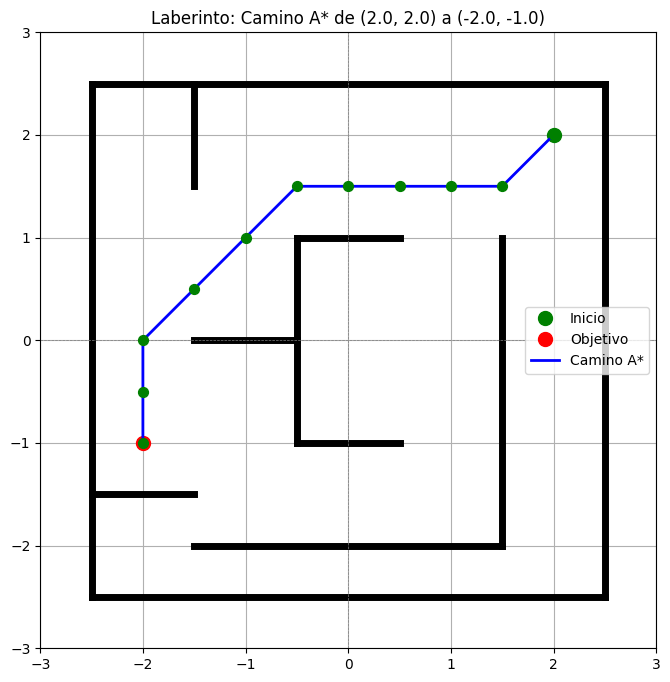

Coordenadas del camino A*: [[-2.   2. ]
 [-2.   1.5]
 [-2.   1. ]
 [-2.   0.5]
 [-2.   0. ]
 [-2.  -0.5]
 [-2.  -1. ]
 [-1.5 -1. ]
 [-1.  -1. ]
 [-0.5 -1.5]
 [ 0.  -1.5]
 [ 0.5 -1.5]
 [ 1.  -1. ]
 [ 0.5 -0.5]
 [ 0.   0. ]
 [ 0.5  0.5]
 [ 1.   1. ]
 [ 1.5  1.5]
 [ 2.   2. ]
 [ 2.   1.5]
 [ 2.   1. ]
 [ 2.   0.5]
 [ 2.   0. ]
 [ 2.  -0.5]
 [ 2.  -1. ]
 [ 2.  -1.5]
 [ 2.  -2. ]]


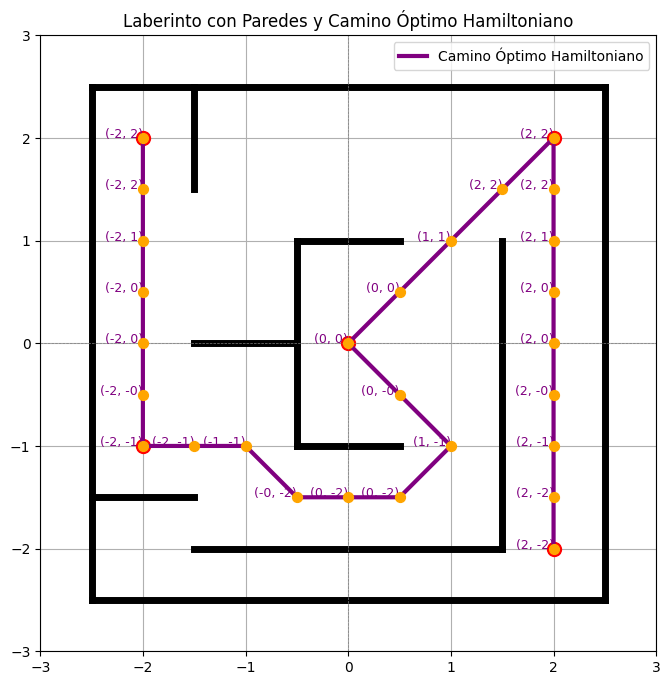

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Generar vecinos (incluyendo movimientos diagonales)
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(0.5, 0), (-0.5, 0), (0, 0.5), (0, -0.5), (0.5, 0.5), (0.5, -0.5), (-0.5, 0.5), (-0.5, -0.5)]
    ]

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y los caminos A*
def draw_a_star_path(walls, start, goal, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar el punto de inicio y el objetivo
    plt.plot(start[0], start[1], 'go', markersize=10, label='Inicio')  # Inicio en verde
    plt.plot(goal[0], goal[1], 'ro', markersize=10, label='Objetivo')  # Objetivo en rojo

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino A*')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino A*:", path)

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title(f"Laberinto: Camino A* de {start} a {goal}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Función para dibujar el laberinto y el camino hamiltoniano
def draw_hamiltonian_path(walls, goals, hamiltonian_path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino hamiltoniano si existe
    if hamiltonian_path:
        hamiltonian_path = np.array(hamiltonian_path)
        plt.plot(hamiltonian_path[:, 0], hamiltonian_path[:, 1], 'purple', lw=3, label='Camino Óptimo Hamiltoniano')  # Camino hamiltoniano en púrpura
        plt.scatter(hamiltonian_path[:, 0], hamiltonian_path[:, 1], color='orange', s=50, zorder=5)  # Coordenadas en naranja
        print("Coordenadas del camino A*:", hamiltonian_path)

        # Imprimir las coordenadas del camino en el gráfico
        for (x, y) in hamiltonian_path:
            plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='purple')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo Hamiltoniano")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar y dibujar caminos A* entre cada par de puntos objetivo
for i in range(len(goals)):
    for j in range(i + 1, len(goals)):
        start = goals[i]
        goal = goals[j]
        path = a_star(start, goal)
        draw_a_star_path(walls, start, goal, path)

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino hamiltoniano
draw_hamiltonian_path(walls, goals, optimal_path)


In [ ]:
def find_and_draw_optimal_paths(goals):
    paths = {}

    # Calcular el camino óptimo entre cada par de puntos objetivo
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)  # Usar el algoritmo A* para encontrar el camino
            if path:
                paths[(start, goal)] = path
                print(f"Camino óptimo de {start} a {goal}: {path}")  # Imprimir el camino encontrado

    # Dibujar el laberinto y los caminos óptimos
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar todos los caminos óptimos encontrados
    for (start, goal), path in paths.items():
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], lw=2)  # Dibujar el camino
        plt.scatter(path[:, 0], path[:, 1], s=30)  # Marcar los puntos en el camino

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Caminos Óptimos entre Puntos Objetivo en el Laberinto")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()


Camino óptimo de (0.0, 0.0) a (-2.0, 2.0): [(0.0, 0.0), (0.5, 0.5), (1.0, 1.0), (0.5, 1.5), (0.0, 1.5), (-0.5, 1.5), (-1.0, 1.0), (-1.5, 1.0), (-2.0, 1.5), (-2.0, 2.0)]
Camino óptimo de (0.0, 0.0) a (2.0, -2.0): [(0.0, 0.0), (0.5, 0.5), (1.0, 1.0), (1.5, 1.5), (2.0, 1.0), (2.0, 0.5), (2.0, 0.0), (2.0, -0.5), (2.0, -1.0), (2.0, -1.5), (2.0, -2.0)]
Camino óptimo de (0.0, 0.0) a (2.0, 2.0): [(0.0, 0.0), (0.5, 0.5), (1.0, 1.0), (1.5, 1.5), (2.0, 2.0)]
Camino óptimo de (0.0, 0.0) a (-2.0, -1.0): [(0.0, 0.0), (0.5, -0.5), (1.0, -1.0), (0.5, -1.5), (0.0, -1.5), (-0.5, -1.5), (-1.0, -1.0), (-1.5, -1.0), (-2.0, -1.0)]
Camino óptimo de (-2.0, 2.0) a (2.0, -2.0): [(-2.0, 2.0), (-2.0, 1.5), (-1.5, 1.0), (-1.0, 1.0), (-0.5, 1.5), (0.0, 1.5), (0.5, 1.5), (1.0, 1.5), (1.5, 1.5), (2.0, 1.0), (2.0, 0.5), (2.0, 0.0), (2.0, -0.5), (2.0, -1.0), (2.0, -1.5), (2.0, -2.0)]
Camino óptimo de (-2.0, 2.0) a (2.0, 2.0): [(-2.0, 2.0), (-2.0, 1.5), (-1.5, 1.0), (-1.0, 1.0), (-0.5, 1.5), (0.0, 1.5), (0.5, 2.0), (1.0

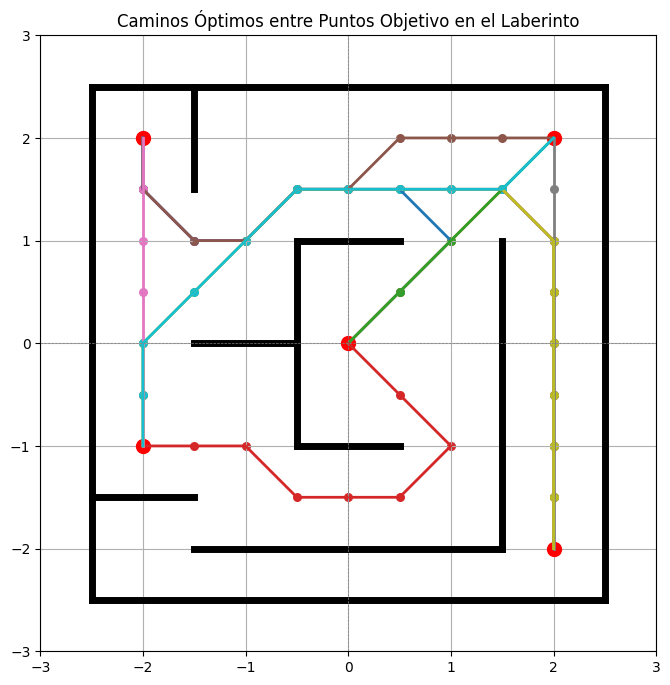

In [ ]:
find_and_draw_optimal_paths(goals)


Puntos óptimos que conectan todos los objetivos:
(0.0, 0.0)
(0.5, 0.5)
(1.0, 1.0)
(0.5, 1.5)
(0.0, 1.5)
(-0.5, 1.5)
(-1.0, 1.0)
(-1.5, 1.0)
(-2.0, 1.5)
(0.0, 0.0)
(0.5, 0.5)
(1.0, 1.0)
(1.5, 1.5)
(2.0, 1.0)
(2.0, 0.5)
(2.0, 0.0)
(2.0, -0.5)
(2.0, -1.0)
(2.0, -1.5)
(0.0, 0.0)
(0.5, 0.5)
(1.0, 1.0)
(1.5, 1.5)
(0.0, 0.0)
(0.5, -0.5)
(1.0, -1.0)
(0.5, -1.5)
(0.0, -1.5)
(-0.5, -1.5)
(-1.0, -1.0)
(-1.5, -1.0)
(-2.0, 2.0)
(-2.0, 1.5)
(-1.5, 1.0)
(-1.0, 1.0)
(-0.5, 1.5)
(0.0, 1.5)
(0.5, 1.5)
(1.0, 1.5)
(1.5, 1.5)
(2.0, 1.0)
(2.0, 0.5)
(2.0, 0.0)
(2.0, -0.5)
(2.0, -1.0)
(2.0, -1.5)
(-2.0, 2.0)
(-2.0, 1.5)
(-1.5, 1.0)
(-1.0, 1.0)
(-0.5, 1.5)
(0.0, 1.5)
(0.5, 2.0)
(1.0, 2.0)
(1.5, 2.0)
(-2.0, 2.0)
(-2.0, 1.5)
(-2.0, 1.0)
(-2.0, 0.5)
(-2.0, 0.0)
(-2.0, -0.5)
(2.0, -2.0)
(2.0, -1.5)
(2.0, -1.0)
(2.0, -0.5)
(2.0, 0.0)
(2.0, 0.5)
(2.0, 1.0)
(2.0, 1.5)
(2.0, -2.0)
(2.0, -1.5)
(2.0, -1.0)
(2.0, -0.5)
(2.0, 0.0)
(2.0, 0.5)
(2.0, 1.0)
(1.5, 1.5)
(1.0, 1.5)
(0.5, 1.5)
(0.0, 1.5)
(-0.5, 1.5)
(-1.0, 1.0)
(-

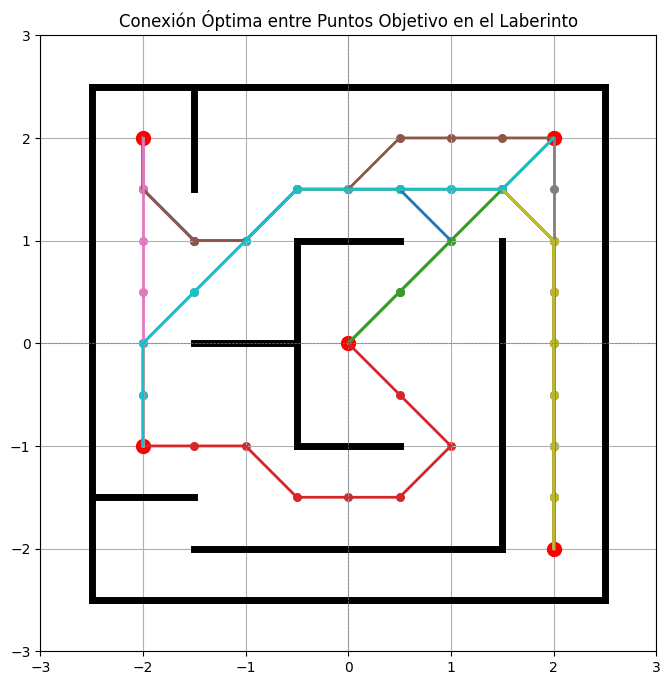

In [ ]:
def find_optimal_connection_path(goals):
    # Lista para almacenar todos los caminos entre cada par de objetivos
    all_paths = []

    # Calcular el camino óptimo entre cada par de puntos objetivo
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)  # Usar el algoritmo A* para encontrar el camino
            if path:
                all_paths.append(path)  # Almacenar el camino encontrado

    # Concatenar todos los caminos encontrados en una sola lista de puntos
    optimal_points = []
    for path in all_paths:
        optimal_points.extend(path[:-1])  # Agregar todos los puntos menos el último para evitar duplicados

    optimal_points.append(goals[-1])  # Asegurarse de incluir el último objetivo

    # Imprimir los puntos óptimos
    print("Puntos óptimos que conectan todos los objetivos:")
    for point in optimal_points:
        print(point)

    # Dibujar el laberinto y los caminos óptimos
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar todos los caminos óptimos encontrados
    for path in all_paths:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], lw=2)  # Dibujar el camino
        plt.scatter(path[:, 0], path[:, 1], s=30)  # Marcar los puntos en el camino

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Conexión Óptima entre Puntos Objetivo en el Laberinto")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return optimal_points  # Devolver la lista de puntos óptimos

optimal_path_points = find_optimal_connection_path(goals)


Puntos óptimos que conectan todos los objetivos (sin duplicados):
(0.0, -1.5)
(2.0, 2.0)
(2.0, -1.5)
(0.5, 1.5)
(1.5, 2.0)
(-1.5, -1.0)
(-1.5, 1.0)
(-1.0, -1.0)
(-2.0, -1.0)
(-1.0, 1.0)
(-2.0, 1.5)
(-2.0, 1.0)
(-0.5, -1.5)
(0.0, 1.5)
(0.5, 0.5)
(2.0, -1.0)
(2.0, -2.0)
(1.5, 1.5)
(2.0, 1.0)
(0.5, -0.5)
(1.0, 2.0)
(2.0, 1.5)
(-1.5, 0.5)
(-2.0, 0.5)
(-2.0, 0.0)
(-2.0, -0.5)
(-0.5, 1.5)
(0.0, 0.0)
(1.0, 1.0)
(1.0, 1.5)
(2.0, 0.5)
(2.0, 0.0)
(2.0, -0.5)
(1.0, -1.0)
(0.5, -1.5)
(0.5, 2.0)
(-2.0, 2.0)


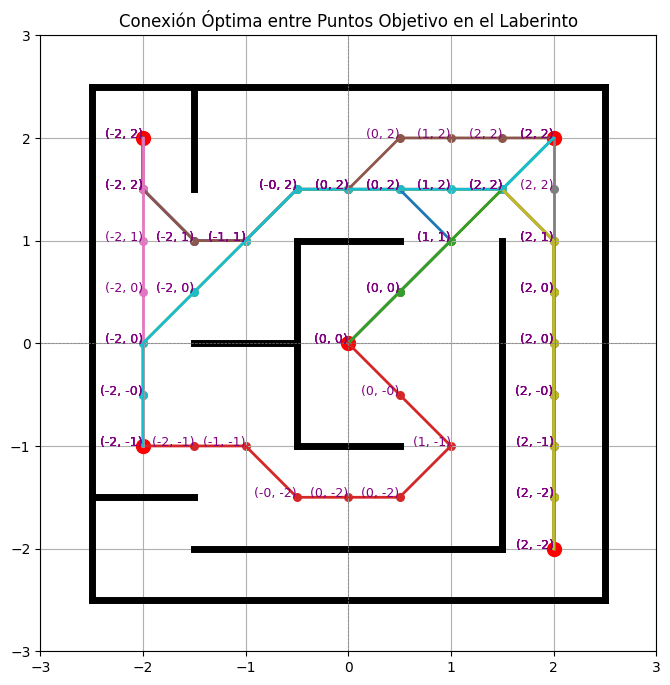

In [ ]:
def find_optimal_connection_path(goals):
    # Usar un conjunto para evitar duplicados
    unique_points = set()

    # Calcular el camino óptimo entre cada par de puntos objetivo
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)  # Usar el algoritmo A* para encontrar el camino
            if path:
                unique_points.update(path)  # Agregar el camino al conjunto

    # Convertir el conjunto a una lista
    optimal_points = list(unique_points)

    # Imprimir los puntos óptimos
    print("Puntos óptimos que conectan todos los objetivos (sin duplicados):")
    for point in optimal_points:
        print(point)

    # Dibujar el laberinto y los caminos óptimos
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar todos los caminos óptimos encontrados
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)
            if path:
                path = np.array(path)
                plt.plot(path[:, 0], path[:, 1], lw=2)  # Dibujar el camino
                plt.scatter(path[:, 0], path[:, 1], s=30)  # Marcar los puntos en el camino

             # Imprimir las coordenadas del camino en el gráfico
            for (x, y) in path:
                plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='purple')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Conexión Óptima entre Puntos Objetivo en el Laberinto")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return optimal_points  # Devolver la lista de puntos óptimos
optimal_path_points = find_optimal_connection_path(goals)


In [ ]:
def generate_neighbors(point):
    x, y = point
    return [
        (x + dx, y + dy) for dx, dy in
        [(1, 0), (-1, 0), (0, 1), (0, -1), (1, 1), (1, -1), (-1, 1), (-1, -1)]
    ]

Coordenadas del camino A*: [[ 0.  0.]
 [ 1.  1.]
 [ 0.  2.]
 [-1.  1.]
 [-2.  1.]
 [-2.  2.]]


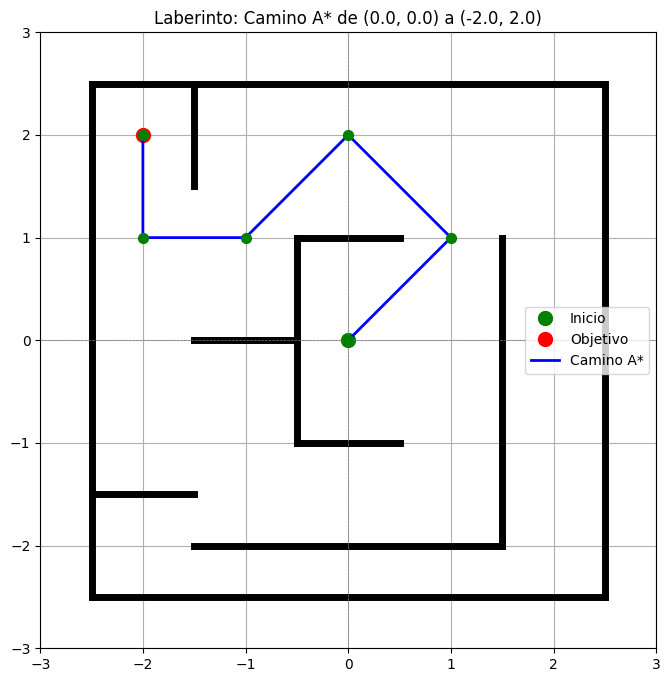

Coordenadas del camino A*: [[ 0.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]]


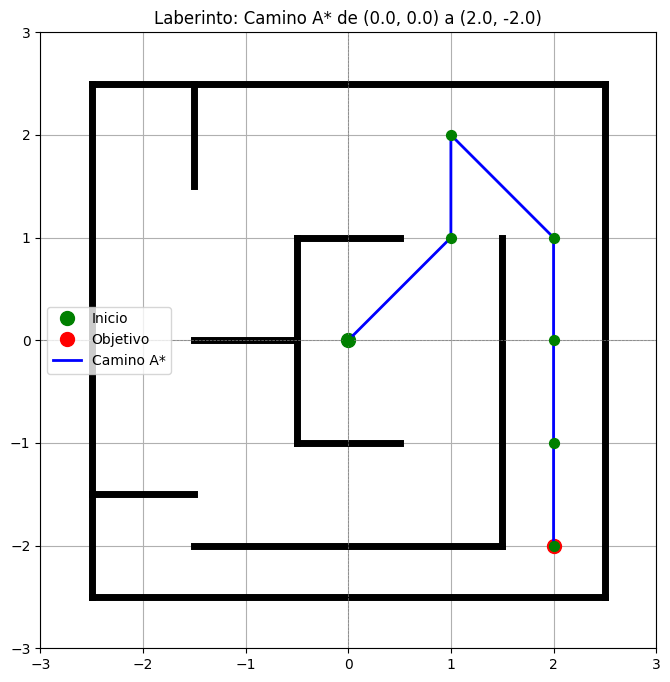

Coordenadas del camino A*: [[0. 0.]
 [1. 1.]
 [2. 2.]]


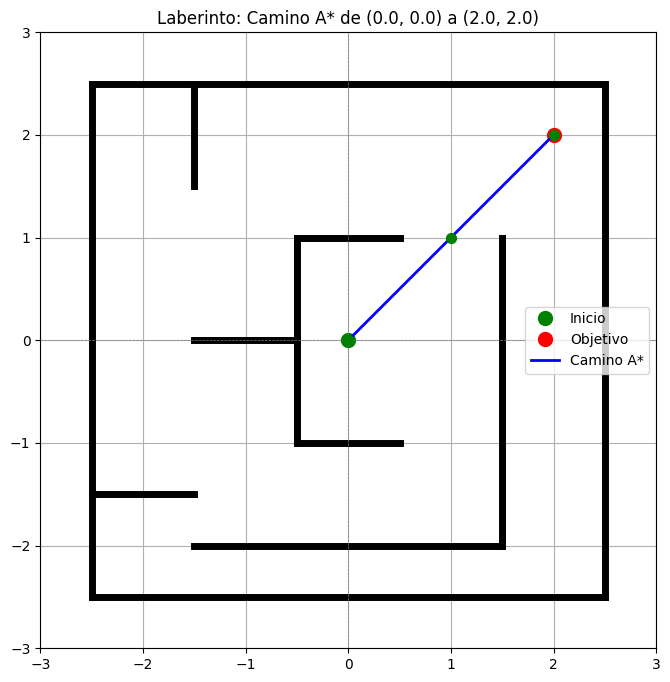

Coordenadas del camino A*: [[ 0.  0.]
 [ 1.  1.]
 [ 0.  2.]
 [-1.  1.]
 [-2.  0.]
 [-2. -1.]]


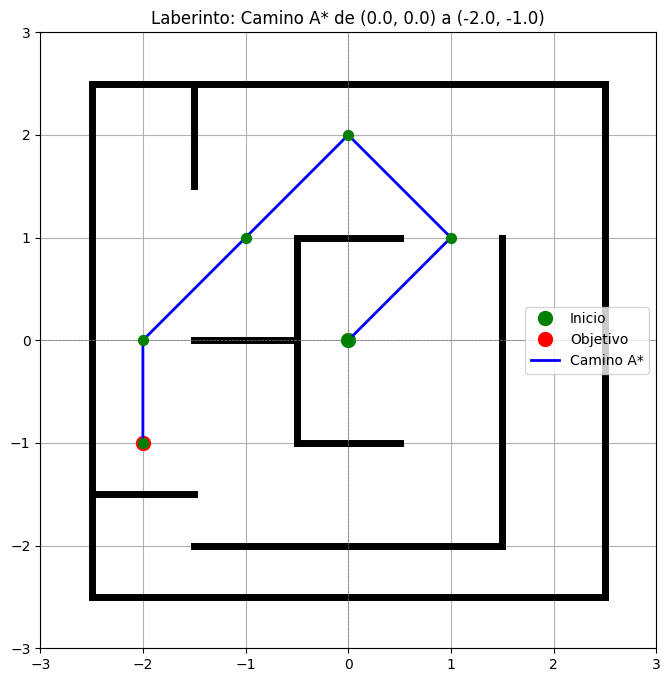

Coordenadas del camino A*: [[-2.  2.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]]


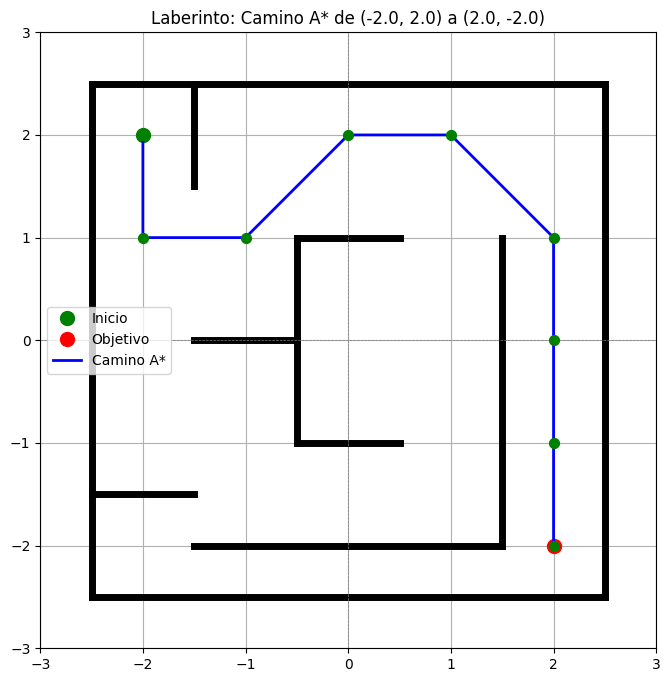

Coordenadas del camino A*: [[-2.  2.]
 [-2.  1.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  2.]
 [ 2.  2.]]


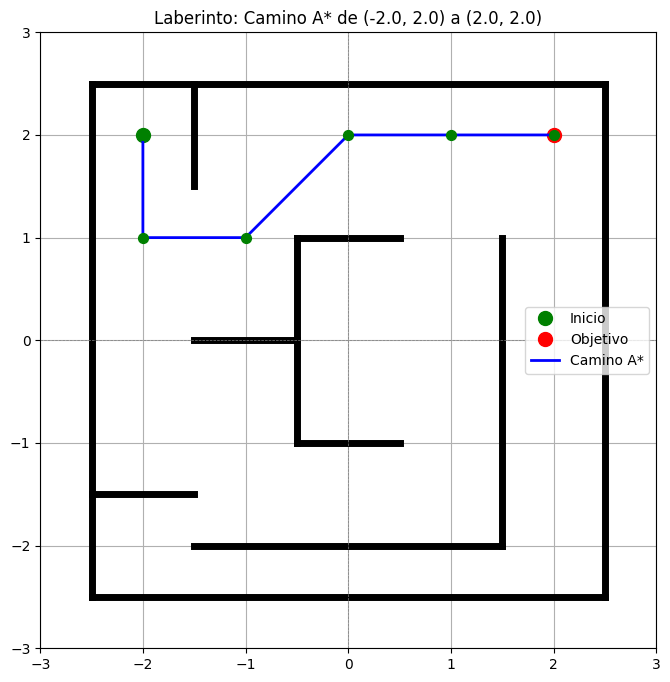

Coordenadas del camino A*: [[-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]]


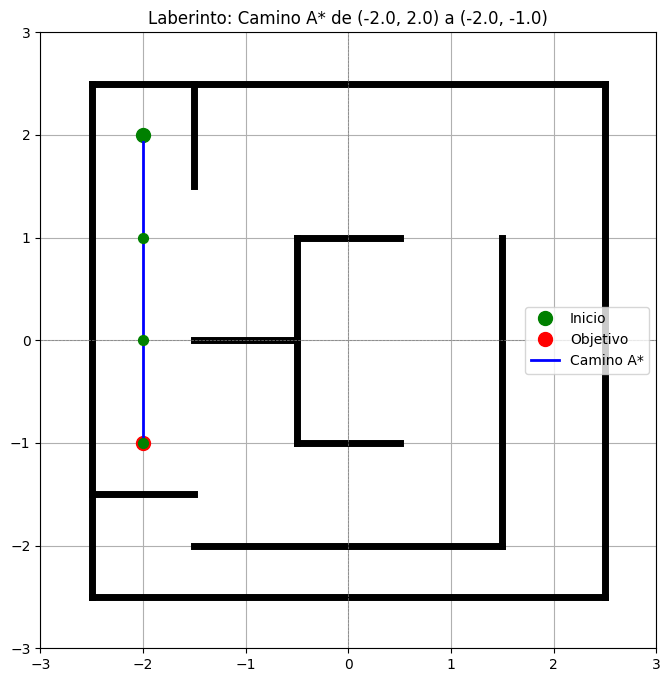

Coordenadas del camino A*: [[ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 2.  2.]]


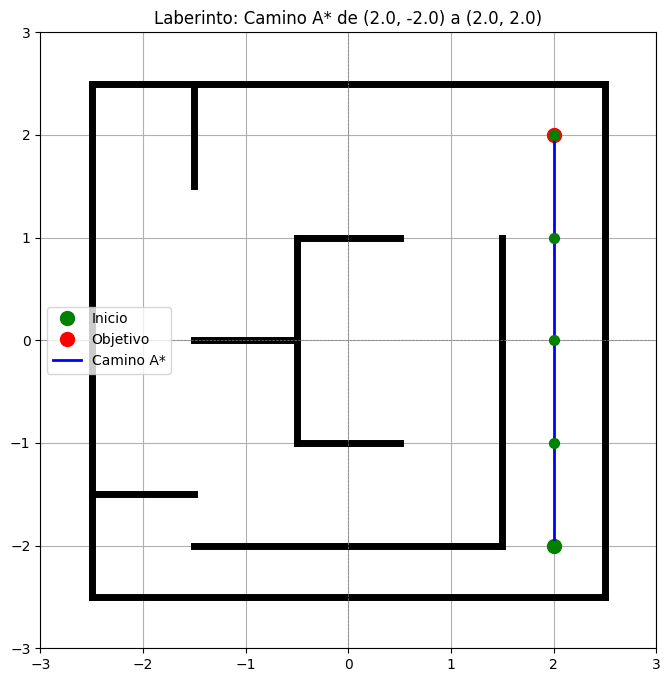

Coordenadas del camino A*: [[ 2. -2.]
 [ 2. -1.]
 [ 2.  0.]
 [ 2.  1.]
 [ 1.  2.]
 [ 0.  2.]
 [-1.  1.]
 [-2.  0.]
 [-2. -1.]]


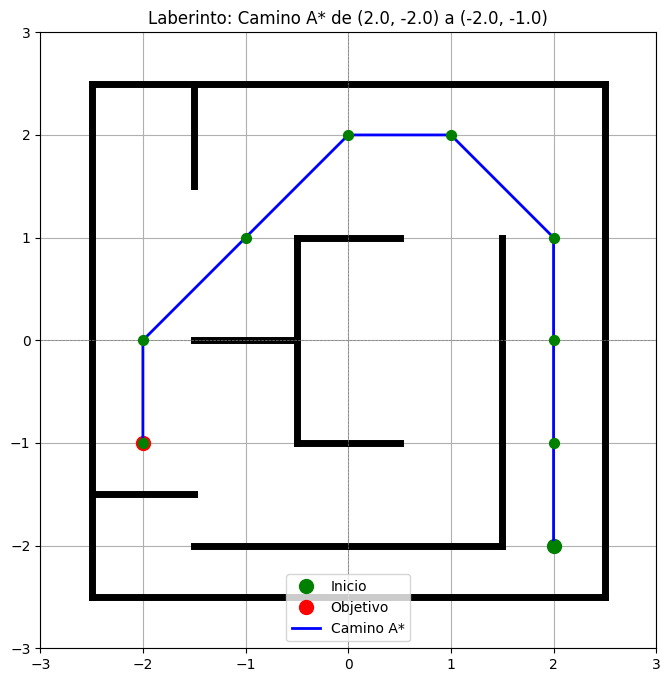

Coordenadas del camino A*: [[ 2.  2.]
 [ 1.  2.]
 [ 0.  2.]
 [-1.  1.]
 [-2.  0.]
 [-2. -1.]]


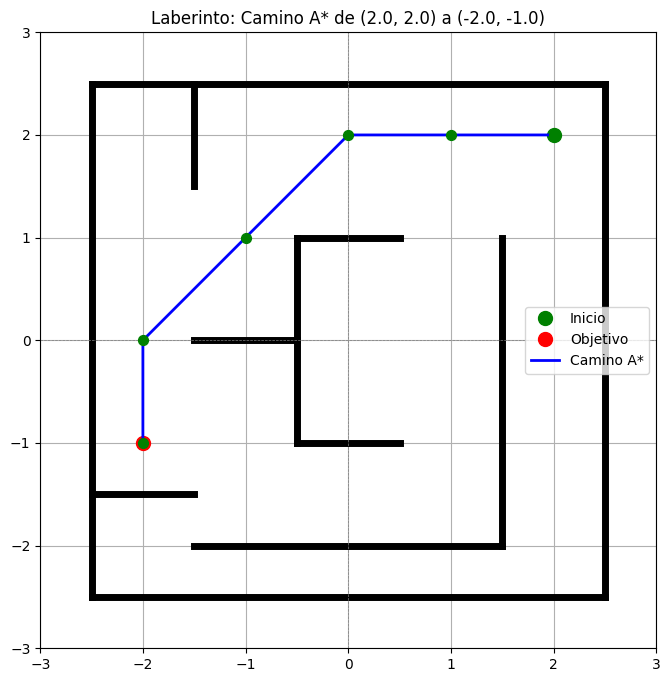

Coordenadas del camino A*: [[-2.  2.]
 [-2.  1.]
 [-2.  0.]
 [-2. -1.]
 [-2.  0.]
 [-1.  1.]
 [ 0.  2.]
 [ 1.  1.]
 [ 0.  0.]
 [ 1.  1.]
 [ 2.  2.]
 [ 2.  1.]
 [ 2.  0.]
 [ 2. -1.]
 [ 2. -2.]]


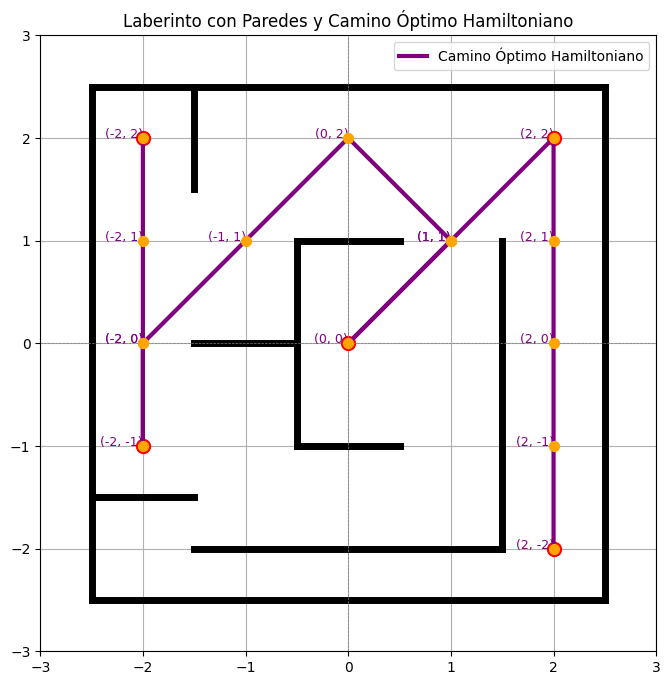

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from queue import PriorityQueue
from itertools import permutations

# Definir las paredes del laberinto
walls = [
    (2.5, -2.5, 2.5, 2.5),  # Wall 1
    (-2.5, -2.5, -2.5, 2.5),  # Wall 2
    (-2.5, 2.5, 2.5, 2.5),  # Wall 3
    (-2.5, -2.5, 2.5, -2.5),  # Wall 4
    (1.5, -2.0, 1.5, 1.0),  # Wall 5
    (-0.5, -1.0, -0.5, 1.0),  # Wall 6
    (-0.5, -1.0, 0.5, -1.0),  # Wall 7
    (-1.5, 1.5, -1.5, 2.5),  # Wall 8
    (-0.5, 1.0, 0.5, 1.0),  # Wall 9
    (-1.5, 0.0, -0.5, 0.0),  # Wall 10
    (-2.5, -1.5, -1.5, -1.5),  # Wall 11
    (-1.5, -2.0, 1.5, -2.0)   # Wall 12
]

# Definir los puntos objetivo
goals = [
    (0.0, 0.0),   # Goal 1
    (-2.0, 2.0),  # Goal 2
    (2.0, -2.0),  # Goal 3
    (2.0, 2.0),   # Goal 4
    (-2.0, -1.0)  # Goal 5
]

# Función para comprobar si hay colisión con las paredes
def is_collision(point1, point2):
    for wall in walls:
        if wall_intersects(point1, point2, (wall[0], wall[1]), (wall[2], wall[3])):
            return True
    return False

def wall_intersects(p1, p2, wall_start, wall_end):
    # Algoritmo de intersección de segmentos
    x1, y1 = p1
    x2, y2 = p2
    x3, y3 = wall_start
    x4, y4 = wall_end

    denom = (x1 - x2) * (y3 - y4) - (y1 - y2) * (x3 - x4)
    if denom == 0:
        return False  # Las líneas son paralelas

    t = ((x1 - x3) * (y3 - y4) - (y1 - y3) * (x3 - x4)) / denom
    u = -((x1 - x2) * (y1 - y3) - (y1 - y2) * (x1 - x3)) / denom

    return (0 <= t <= 1) and (0 <= u <= 1)

# Implementar el algoritmo A* con movimientos diagonales
def a_star(start, goal):
    open_set = PriorityQueue()
    open_set.put((0, start))
    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while not open_set.empty():
        current = open_set.get()[1]

        # Si llegamos al goal, reconstruimos el camino
        if current == goal:
            return reconstruct_path(came_from, current)

        # Generar los vecinos (incluyendo movimientos diagonales)
        neighbors = generate_neighbors(current)
        for neighbor in neighbors:
            if is_collision(current, neighbor):
                continue

            tentative_g_score = g_score[current] + distance(current, neighbor)
            if neighbor not in g_score or tentative_g_score < g_score[neighbor]:
                came_from[neighbor] = current
                g_score[neighbor] = tentative_g_score
                f_score[neighbor] = g_score[neighbor] + heuristic(neighbor, goal)
                if neighbor not in [i[1] for i in open_set.queue]:
                    open_set.put((f_score[neighbor], neighbor))

    return None  # No se encontró un camino

# Heurística para A*
def heuristic(a, b):
    return np.linalg.norm(np.array(a) - np.array(b))

# Función para reconstruir el camino
def reconstruct_path(came_from, current):
    total_path = [current]
    while current in came_from:
        current = came_from[current]
        total_path.append(current)
    return total_path[::-1]  # Invertir el camino

# Calcular la distancia entre dos puntos
def distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calcular el camino que pasa por todos los puntos
def find_hamiltonian_path(goals):
    shortest_path = None
    min_length = float('inf')

    for perm in permutations(goals):
        total_path = [perm[0]]  # Comenzar desde el primer objetivo
        valid_path = True

        # Obtener el camino entre cada par de objetivos
        for i in range(len(perm) - 1):
            path_segment = a_star(perm[i], perm[i + 1])
            if path_segment is None:
                valid_path = False
                break
            total_path.extend(path_segment[1:])  # Excluir el punto de inicio

        # Verificar si es un camino válido y si es más corto
        if valid_path:
            total_path_length = len(total_path)
            if total_path_length < min_length:
                min_length = total_path_length
                shortest_path = total_path

    return shortest_path

# Función para dibujar el laberinto y los caminos A*
def draw_a_star_path(walls, start, goal, path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar el punto de inicio y el objetivo
    plt.plot(start[0], start[1], 'go', markersize=10, label='Inicio')  # Inicio en verde
    plt.plot(goal[0], goal[1], 'ro', markersize=10, label='Objetivo')  # Objetivo en rojo

    # Dibujar el camino si existe
    if path:
        path = np.array(path)
        plt.plot(path[:, 0], path[:, 1], 'b-', lw=2, label='Camino A*')  # Camino en azul
        plt.scatter(path[:, 0], path[:, 1], color='green', s=50, zorder=5)  # Coordenadas en verde
        print("Coordenadas del camino A*:", path)

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title(f"Laberinto: Camino A* de {start} a {goal}")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Función para dibujar el laberinto y el camino hamiltoniano
def draw_hamiltonian_path(walls, goals, hamiltonian_path=None):
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar el camino hamiltoniano si existe
    if hamiltonian_path:
        hamiltonian_path = np.array(hamiltonian_path)
        plt.plot(hamiltonian_path[:, 0], hamiltonian_path[:, 1], 'purple', lw=3, label='Camino Óptimo Hamiltoniano')  # Camino hamiltoniano en púrpura
        plt.scatter(hamiltonian_path[:, 0], hamiltonian_path[:, 1], color='orange', s=50, zorder=5)  # Coordenadas en naranja
        print("Coordenadas del camino A*:", hamiltonian_path)

        # Imprimir las coordenadas del camino en el gráfico
        for (x, y) in hamiltonian_path:
            plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='purple')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Laberinto con Paredes y Camino Óptimo Hamiltoniano")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.legend()
    plt.show()

# Encontrar y dibujar caminos A* entre cada par de puntos objetivo
for i in range(len(goals)):
    for j in range(i + 1, len(goals)):
        start = goals[i]
        goal = goals[j]
        path = a_star(start, goal)
        draw_a_star_path(walls, start, goal, path)

# Encontrar el camino hamiltoniano
optimal_path = find_hamiltonian_path(goals)

# Dibujar el laberinto y el camino hamiltoniano
draw_hamiltonian_path(walls, goals, optimal_path)


Puntos óptimos que conectan todos los objetivos (sin duplicados):
(2.0, -1.0)
(2.0, -2.0)
(1.0, 2.0)
(2.0, 1.0)
(-2.0, -1.0)
(0.0, 0.0)
(-2.0, 1.0)
(1.0, 1.0)
(-1.0, 1.0)
(2.0, 0.0)
(-2.0, 0.0)
(0.0, 2.0)
(2.0, 2.0)
(-2.0, 2.0)


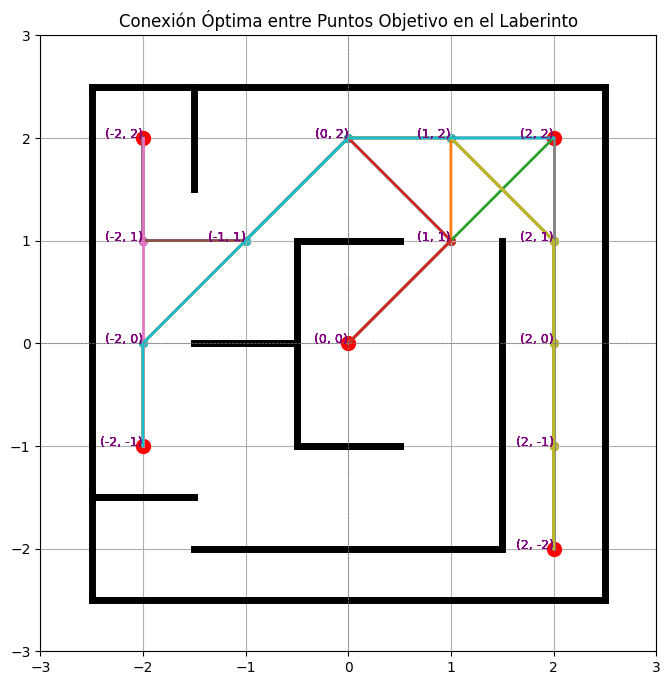

In [ ]:
def find_optimal_connection_path(goals):
    # Usar un conjunto para evitar duplicados
    unique_points = set()

    # Calcular el camino óptimo entre cada par de puntos objetivo
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)  # Usar el algoritmo A* para encontrar el camino
            if path:
                unique_points.update(path)  # Agregar el camino al conjunto

    # Convertir el conjunto a una lista
    optimal_points = list(unique_points)

    # Imprimir los puntos óptimos
    print("Puntos óptimos que conectan todos los objetivos (sin duplicados):")
    for point in optimal_points:
        print(point)

    # Dibujar el laberinto y los caminos óptimos
    plt.figure(figsize=(8, 8))

    # Dibujar paredes
    for wall in walls:
        plt.plot([wall[0], wall[2]], [wall[1], wall[3]], 'k-', lw=5)

    # Dibujar puntos objetivo
    for goal in goals:
        plt.plot(goal[0], goal[1], 'ro', markersize=10)

    # Dibujar todos los caminos óptimos encontrados
    for i in range(len(goals)):
        for j in range(i + 1, len(goals)):
            start = goals[i]
            goal = goals[j]
            path = a_star(start, goal)
            if path:
                path = np.array(path)
                plt.plot(path[:, 0], path[:, 1], lw=2)  # Dibujar el camino
                plt.scatter(path[:, 0], path[:, 1], s=30)  # Marcar los puntos en el camino

             # Imprimir las coordenadas del camino en el gráfico
            for (x, y) in path:
                plt.text(x, y, f"({x:.0f}, {y:.0f})", fontsize=9, ha='right', color='purple')

    plt.xlim(-3, 3)
    plt.ylim(-3, 3)
    plt.axhline(0, color='grey', lw=0.5, ls='--')
    plt.axvline(0, color='grey', lw=0.5, ls='--')
    plt.grid(True)
    plt.title("Conexión Óptima entre Puntos Objetivo en el Laberinto")
    plt.gca().set_aspect('equal', adjustable='box')
    plt.show()

    return optimal_points  # Devolver la lista de puntos óptimos
optimal_path_points = find_optimal_connection_path(goals)
